In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

game_updates = pd.read_csv("../data/game_updates.csv")
installs = pd.read_csv("../data/installs.csv")           
retention = pd.read_csv("../data/retention.csv")          
ua = pd.read_csv("../data/user_acquisition.csv")          

In [2]:
# Convert date columns to datetime format

game_updates['update_date'] = pd.to_datetime(game_updates['update_date'])
installs['install_date'] = pd.to_datetime(installs['install_date'])
if 'install_date' in ua.columns:
    ua['install_date'] = pd.to_datetime(ua['install_date'])

In [3]:
first_update_date = game_updates['update_date'].min()

installs['update_period'] = np.where(installs['install_date'] < first_update_date, 'Pre-Update', 'Post-Update')

user_data = installs.merge(retention, on='user_id', how='left')

# Pre-update users
pre_update = user_data[user_data['update_period'] == 'Pre-Update']
post_update = user_data[user_data['update_period'] == 'Post-Update']

# Retention Average
retention_stats = pd.DataFrame({
    'D1 Retention': [pre_update['d1_retained'].mean(), post_update['d1_retained'].mean()],
    'D7 Retention': [pre_update['d7_retained'].mean(), post_update['d7_retained'].mean()],
    'D30 Retention': [pre_update['d30_retained'].mean(), post_update['d30_retained'].mean()]
}, index=['Pre-Update', 'Post-Update'])

print("Retention Rates Before and After Update")
print(retention_stats)


Retention Rates Before and After Update
             D1 Retention  D7 Retention  D30 Retention
Pre-Update       0.370370      0.111111       0.185185
Post-Update      0.615622      0.283659       0.079137


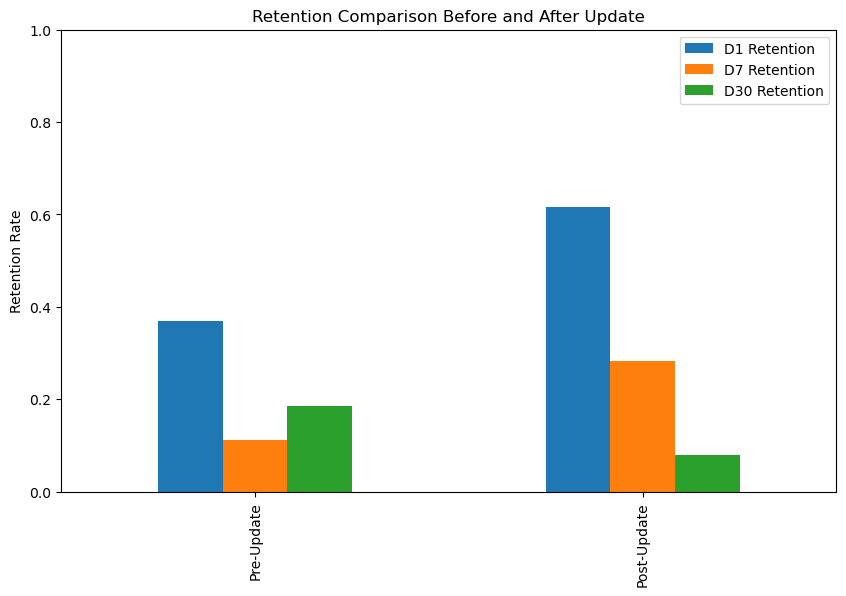


🎨 Creative-Based Overall Performance Summary
  creative_id      cost  impressions  clicks  installs       CPI       CTR  \
0           A  10989.27       695618   20463      7709  1.425512  0.029417   
1           B   7779.19       605991   15945      6334  1.228164  0.026312   
2           C   8861.31       520407   15861      6684  1.325750  0.030478   
3           D   8581.24       564583   17120      6538  1.312518  0.030323   

        CVR  
0  0.376729  
1  0.397241  
2  0.421411  
3  0.381893  


In [7]:

retention_stats.plot(kind='bar', figsize=(10,6), title='Retention Comparison Before and After Update')
plt.ylabel('Retention Rate')
plt.ylim(0, 1)
plt.show()

# Creative-based overall performance analysis 
creative_perf = ua.groupby('creative_id').agg({
    'cost': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'installs': 'sum'
}).reset_index()

# KPI hesaplamaları
creative_perf['CPI'] = creative_perf['cost'] / creative_perf['installs'].replace(0, np.nan)
creative_perf['CTR'] = creative_perf['clicks'] / creative_perf['impressions'].replace(0, np.nan)
creative_perf['CVR'] = creative_perf['installs'] / creative_perf['clicks'].replace(0, np.nan)

print("\n🎨 Creative-Based Overall Performance Summary")
print(creative_perf.head(10))